In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [25]:
#### Paths to data tables ####

## Health outcomes ##

# Life expectancy
life_expectancy = "Resources/life_expectancy.csv"

# Avoidable mortality
avoidable_mortality = "Resources/avoidable_mortality.csv"

# Heart disease
heart_disease_mortality = "Resources/heart_disease_mortality.csv"

# Infant mortality 
infant_mortality = "Resources/infant_mortality.csv"

# Maternal mortality
maternal_mortality = "Resources/maternal_mortality.csv"


## Financial data ##

# Health expenditure and financing
expenditure_financing = "Resources/expenditure_financing.csv"

# Health expenditure from 2015
expenditure_2015 = "Resources/expenditure_financing_2015.csv"

# Percent insured
percent_insured = "Resources/percent_insured.csv"

# Percentage GDP
percent_gdp = "Resources/percent_gdp.csv"

# Types of government financing schemes
schemes = "Resources/ugh_schemes.csv"

In [26]:
life_expectancy_file = pd.read_csv(life_expectancy)
avoidable_mortality_file = pd.read_csv(avoidable_mortality)
infant_mortality_file = pd.read_csv(infant_mortality)
maternal_mortality_file = pd.read_csv(maternal_mortality)
heart_disease_mortality_file = pd.read_csv(heart_disease_mortality)
expenditure_financing_file = pd.read_csv(expenditure_financing)
expenditure_2015_file = pd.read_csv(expenditure_2015)
percent_insured_file = pd.read_csv(percent_insured)
percent_gdp_file = pd.read_csv(percent_gdp)
schemes_file = pd.read_csv(schemes)

In [27]:
# Life expectancy 

life_expectancy_file = life_expectancy_file[["Country", "Year", "Value"]]
life_expectancy_df = life_expectancy_file.rename(columns = {"Value": "Life Expectancy (Years)"})

# Avoidable mortality
avoidable_mortality_file = avoidable_mortality_file[["Country", "Year", "Value"]]
avoidable_mortality_df = avoidable_mortality_file.rename(columns = {"Value": "Avoidable Deaths Per 100,000 Population"})

# Infant mortality 
infant_mortality_file = infant_mortality_file[["Country", "Year", "Value"]]
infant_mortality_df = infant_mortality_file.rename(columns = {"Value": "Infant Mortality (Deaths per 1,000 Live Births)"})

# Maternal mortality
maternal_mortality_file = maternal_mortality_file[["Country", "Year", "Value"]]
maternal_mortality_df = maternal_mortality_file.rename(columns = {"Value": "Maternal Mortality (Deaths per 100,000 Live Births)"})

# Heart disease mortality
heart_disease_mortality_file = heart_disease_mortality_file[["Country", "Year", "Value"]]
heart_disease_mortality_df = heart_disease_mortality_file.rename(columns = {"Value": "Death from Heart Disease per 100,000 Population"})

# Percent GDP spent on health over 20 years
percent_gdp_file = percent_gdp_file[["Country", "Year", "Value"]]
percent_gdp_df = percent_gdp_file.rename(columns = {"Value": "Percent of GDP Spent on Health Care"})

# Health expenditure per capita from 2018
expenditure_financing_file = expenditure_financing_file[["Country", "Year", "Value"]]
expenditure_financing_df = expenditure_financing_file.rename(columns = {"Value": "Health Expenditure Per Capita, Current Prices, Current PPP"})

# Health expenditure from 2015
expenditure_2015_file = expenditure_2015_file[["Country", "Year", "Value"]]
expenditure_2015_df = expenditure_2015_file.rename(columns = {"Value": "Health Expenditure Per Capita, Current Prices, Current PPP"})

# Percent of population insured
percent_insured_file = percent_insured_file[["Country", "Year", "Value"]]
percent_insured_df = percent_insured_file.rename(columns = {"Value": "Total Percent of Population with Health Insurance"})

# Government schemes, compulsory schemes, and voluntary schemes
schemes_file = schemes_file[["Country", "Year", "Financing scheme", "Value"]]
schemes_df = schemes_file.rename(columns={"Value": "Percent of Total Health Expenditure"})

In [28]:
merge1 = pd.merge(life_expectancy_df, avoidable_mortality_df, on=["Country", "Year"], how='outer')
merge2 = pd.merge(merge1, infant_mortality_df, on=["Country", "Year"], how='outer')
merge3 = pd.merge(merge2, maternal_mortality_df, on=["Country", "Year"], how='outer')
merge4 = pd.merge(merge3, heart_disease_mortality_df, on=["Country", "Year"], how='outer')
merge5 = pd.merge(merge4, expenditure_financing_df, on=["Country", "Year"], how='outer')
merge6 = pd.merge(merge5, percent_insured_df, on=["Country", "Year"], how='outer')

# Rename main table
health_spending = merge6

In [29]:
## Print top 10 countries scheme distribution

top_ten_schemes = schemes_df[(schemes_df["Country"] == "United States") |
                             (schemes_df["Country"] == "Switzerland") |
                             (schemes_df["Country"] == "Norway") |
                             (schemes_df["Country"] == "Germany") |
                             (schemes_df["Country"] == "Austria") |
                             (schemes_df["Country"] == "Netherlands") |
                             (schemes_df["Country"] == "Sweden") |
                             (schemes_df["Country"] == "Canada") |
                             (schemes_df["Country"] == "Belgium") |
                             (schemes_df["Country"] == "Denmark")
                             ]


In [30]:
# Set up merged data table for bar chart

health_spending_avg = health_spending.groupby("Country").mean()

# Unstack Top Ten schemes so we can make a stacked bar chart
top_schemes_grouped = top_ten_schemes.groupby(["Country", "Financing scheme"]).mean()
top_schemes_unstacked = top_schemes_grouped.unstack("Financing scheme")


In [31]:
### Merge top country financing scheme table with main health spending v outcomes table
top_schemes_health_merged = pd.merge(top_schemes_grouped, health_spending_avg, left_index=True, right_index=True, how='outer')

# Reset index so I can access the financing scheme column for a scatter plot
top_schemes_health_merged.reset_index(inplace=True)

In [32]:
#### Define repeating variables for scatter plots

# Define x axis variables
gov = top_schemes_health_merged[top_schemes_health_merged['Financing scheme'] 
                            == "Government schemes"]["Percent of Total Health Expenditure"]
compulsory = top_schemes_health_merged[top_schemes_health_merged['Financing scheme'] 
                            == "Compulsory contributory health insurance schemes"]["Percent of Total Health Expenditure"]
voluntary = top_schemes_health_merged[top_schemes_health_merged['Financing scheme']
                            == "Voluntary schemes/household out-of-pocket payments"]["Percent of Total Health Expenditure"]

# Identify the United States on the scatter plot
gov_country_name = top_schemes_health_merged.loc[top_schemes_health_merged["Financing scheme"]
                                             == "Government schemes"]["Country"]
compulsory_country_name = top_schemes_health_merged.loc[top_schemes_health_merged["Financing scheme"]
                                             == "Compulsory contributory health insurance schemes"]["Country"]
voluntary_country_name = top_schemes_health_merged.loc[top_schemes_health_merged["Financing scheme"]
                                             == "Voluntary schemes/household out-of-pocket payments"]["Country"]

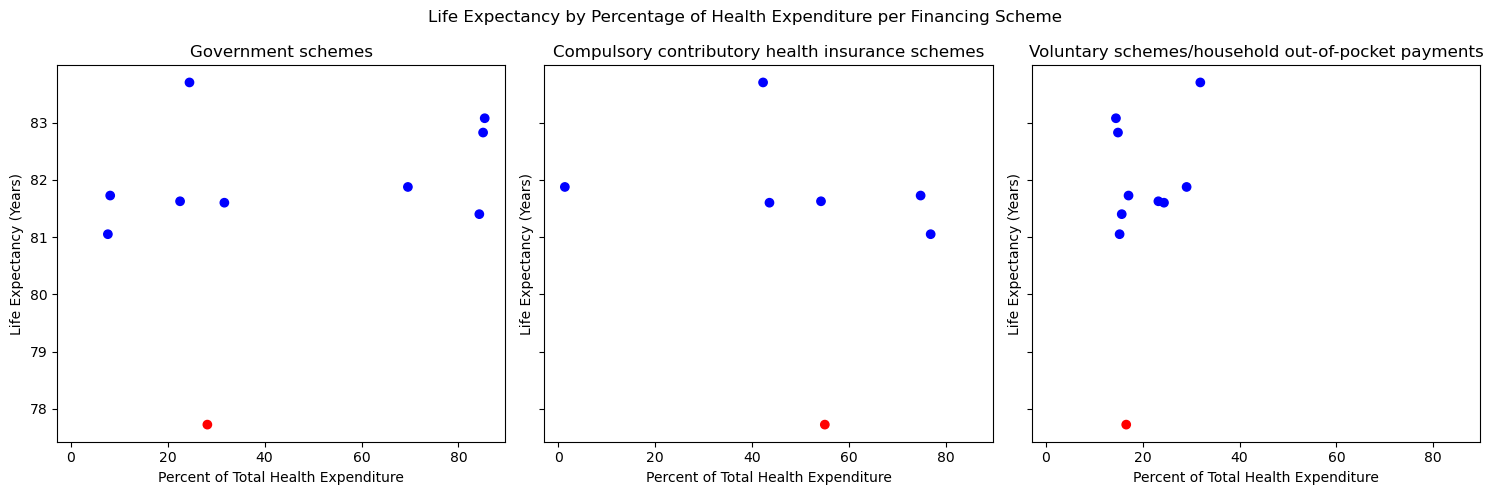

In [33]:
### Financing scheme v life expectancy plot

# Define y axis variables
y_gov = top_schemes_health_merged.loc[top_schemes_health_merged["Financing scheme"] 
                                     == "Government schemes","Life Expectancy (Years)"]
y_compulsory = top_schemes_health_merged.loc[top_schemes_health_merged["Financing scheme"] 
                                     == "Compulsory contributory health insurance schemes","Life Expectancy (Years)"]
y_voluntary = top_schemes_health_merged.loc[top_schemes_health_merged["Financing scheme"] 
                                     == "Voluntary schemes/household out-of-pocket payments","Life Expectancy (Years)"]

# Define scatter plot
####### Used ChatGPT to figure out the following code
fig, axs = plt.subplots(1,3, figsize=(15,5), sharex=True, sharey=True)

# Set three scatter plots in a horizontal line
axs[0].scatter(gov, y_gov, c=np.where(gov_country_name == "United States", 'red', 'blue'))
axs[1].scatter(compulsory, y_compulsory, c=np.where(compulsory_country_name == "United States", 'red', 'blue'))
axs[2].scatter(voluntary, y_voluntary, c=np.where(voluntary_country_name == "United States", 'red', 'blue'))

# Modify plots
for ax, title in zip(axs, ['Government schemes', 'Compulsory contributory health insurance schemes', 'Voluntary schemes/household out-of-pocket payments']):
    ax.set_xlabel("Percent of Total Health Expenditure")
    ax.set_ylabel("Life Expectancy (Years)")
    ax.set_title(title)

plt.suptitle("Life Expectancy by Percentage of Health Expenditure per Financing Scheme")

plt.tight_layout()

plt.savefig("output_data/top_ten_life_expectancy.png", bbox_inches='tight')

plt.show()

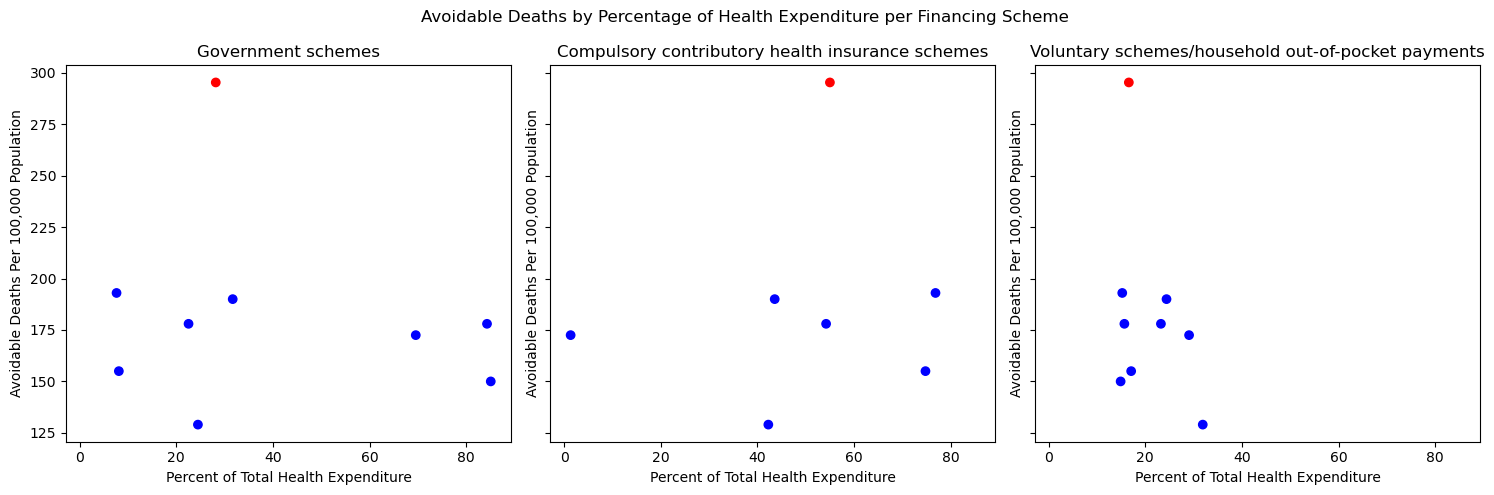

<Figure size 640x480 with 0 Axes>

In [34]:
### Financing scheme v avoidable deaths

# Define y axis variables
y_gov = top_schemes_health_merged.loc[top_schemes_health_merged["Financing scheme"] 
                                     == "Government schemes","Avoidable Deaths Per 100,000 Population"]
y_compulsory = top_schemes_health_merged.loc[top_schemes_health_merged["Financing scheme"] 
                                     == "Compulsory contributory health insurance schemes","Avoidable Deaths Per 100,000 Population"]
y_voluntary = top_schemes_health_merged.loc[top_schemes_health_merged["Financing scheme"] 
                                     == "Voluntary schemes/household out-of-pocket payments","Avoidable Deaths Per 100,000 Population"]

# Define scatter plot
####### Used ChatGPT to figure out the following code
fig, axs = plt.subplots(1,3, figsize=(15,5), sharex=True, sharey=True)

# Set three scatter plots in a horizontal line
axs[0].scatter(gov, y_gov, c=np.where(gov_country_name == "United States", 'red', 'blue'))
axs[1].scatter(compulsory, y_compulsory, c=np.where(compulsory_country_name == "United States", 'red', 'blue'))
axs[2].scatter(voluntary, y_voluntary, c=np.where(voluntary_country_name == "United States", 'red', 'blue'))

# Modify plots
for ax, title in zip(axs, ['Government schemes', 'Compulsory contributory health insurance schemes', 'Voluntary schemes/household out-of-pocket payments']):
    ax.set_xlabel("Percent of Total Health Expenditure")
    ax.set_ylabel("Avoidable Deaths Per 100,000 Population")
    ax.set_title(title)

plt.suptitle("Avoidable Deaths by Percentage of Health Expenditure per Financing Scheme")

plt.tight_layout()

plt.show()

plt.savefig("output_data/top_ten_avoidable_death.png")

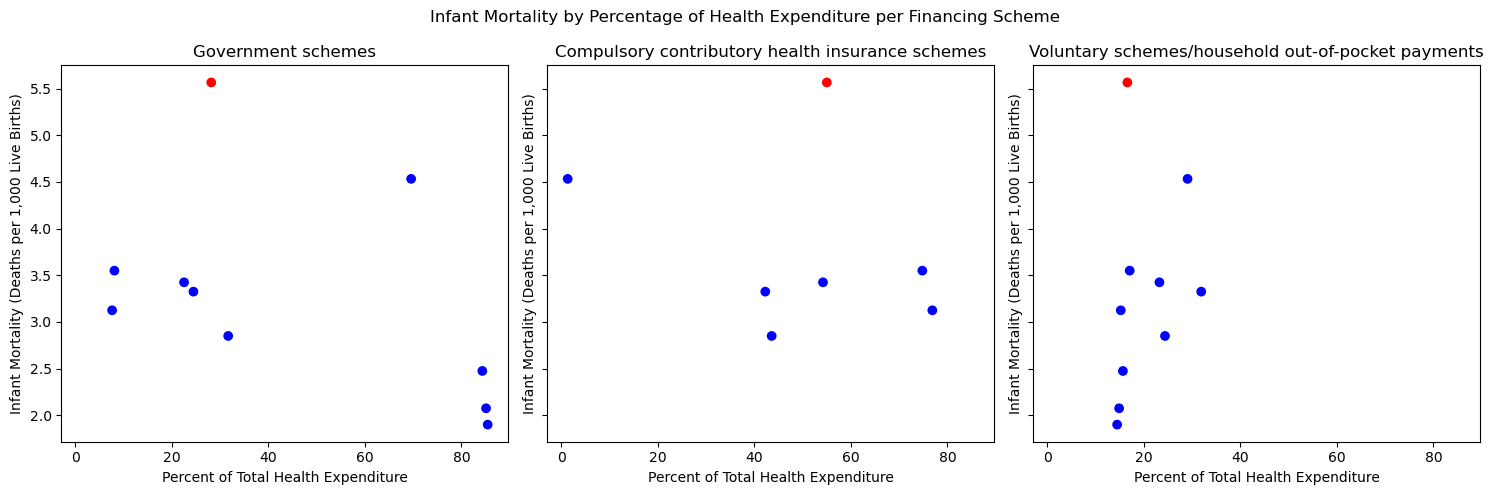

In [35]:
### Financing scheme v Infant Mortality

# Define y axis variables
y_gov = top_schemes_health_merged.loc[top_schemes_health_merged["Financing scheme"] 
                                     == "Government schemes","Infant Mortality (Deaths per 1,000 Live Births)"]
y_compulsory = top_schemes_health_merged.loc[top_schemes_health_merged["Financing scheme"] 
                                     == "Compulsory contributory health insurance schemes","Infant Mortality (Deaths per 1,000 Live Births)"]
y_voluntary = top_schemes_health_merged.loc[top_schemes_health_merged["Financing scheme"] 
                                     == "Voluntary schemes/household out-of-pocket payments","Infant Mortality (Deaths per 1,000 Live Births)"]

# Define scatter plot
####### Used ChatGPT to figure out the following code
fig, axs = plt.subplots(1,3, figsize=(15,5), sharex=True, sharey=True)

# Set three scatter plots in a horizontal line
axs[0].scatter(gov, y_gov, c=np.where(gov_country_name == "United States", 'red', 'blue'))
axs[1].scatter(compulsory, y_compulsory, c=np.where(compulsory_country_name == "United States", 'red', 'blue'))
axs[2].scatter(voluntary, y_voluntary, c=np.where(voluntary_country_name == "United States", 'red', 'blue'))

# Modify plots
for ax, title in zip(axs, ['Government schemes', 'Compulsory contributory health insurance schemes', 'Voluntary schemes/household out-of-pocket payments']):
    ax.set_xlabel("Percent of Total Health Expenditure")
    ax.set_ylabel("Infant Mortality (Deaths per 1,000 Live Births)")
    ax.set_title(title)

plt.suptitle("Infant Mortality by Percentage of Health Expenditure per Financing Scheme")

plt.tight_layout()

plt.savefig("output_data/top_ten_avoidable_death.png", bbox_inches='tight')

plt.show()

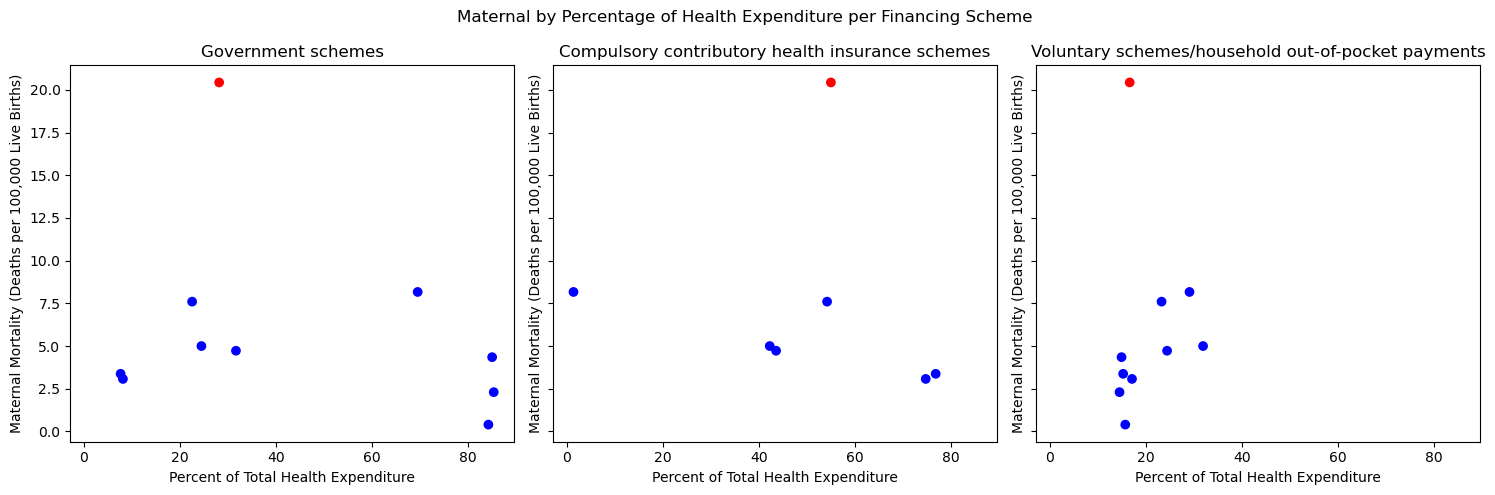

<Figure size 640x480 with 0 Axes>

In [36]:
### Financing scheme v Maternal Mortality

# Define y axis variables
y_gov = top_schemes_health_merged.loc[top_schemes_health_merged["Financing scheme"] 
                                     == "Government schemes","Maternal Mortality (Deaths per 100,000 Live Births)"]
y_compulsory = top_schemes_health_merged.loc[top_schemes_health_merged["Financing scheme"] 
                                     == "Compulsory contributory health insurance schemes","Maternal Mortality (Deaths per 100,000 Live Births)"]
y_voluntary = top_schemes_health_merged.loc[top_schemes_health_merged["Financing scheme"] 
                                     == "Voluntary schemes/household out-of-pocket payments","Maternal Mortality (Deaths per 100,000 Live Births)"]

# Define scatter plot
####### Used ChatGPT to figure out the following code
fig, axs = plt.subplots(1,3, figsize=(15,5), sharex=True, sharey=True)

# Set three scatter plots in a horizontal line
axs[0].scatter(gov, y_gov, c=np.where(gov_country_name == "United States", 'red', 'blue'))
axs[1].scatter(compulsory, y_compulsory, c=np.where(compulsory_country_name == "United States", 'red', 'blue'))
axs[2].scatter(voluntary, y_voluntary, c=np.where(voluntary_country_name == "United States", 'red', 'blue'))

# Modify plots
for ax, title in zip(axs, ['Government schemes', 'Compulsory contributory health insurance schemes', 'Voluntary schemes/household out-of-pocket payments']):
    ax.set_xlabel("Percent of Total Health Expenditure")
    ax.set_ylabel("Maternal Mortality (Deaths per 100,000 Live Births)")
    ax.set_title(title)

plt.suptitle("Maternal by Percentage of Health Expenditure per Financing Scheme")

plt.tight_layout()

plt.show()

plt.savefig("output_data/top_ten_maternal_mortality.png", bbox_inches='tight')

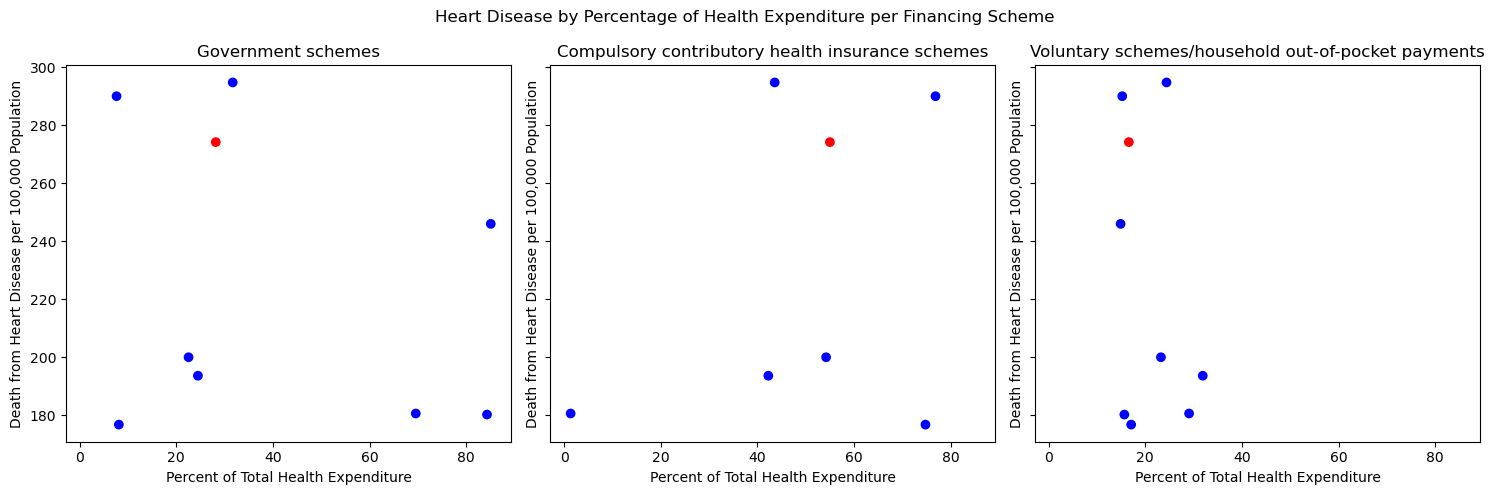

In [37]:
### Financing scheme v heart disease

# Define y axis variables
y_gov = top_schemes_health_merged.loc[top_schemes_health_merged["Financing scheme"] 
                                     == "Government schemes","Death from Heart Disease per 100,000 Population"]
y_compulsory = top_schemes_health_merged.loc[top_schemes_health_merged["Financing scheme"] 
                                     == "Compulsory contributory health insurance schemes","Death from Heart Disease per 100,000 Population"]
y_voluntary = top_schemes_health_merged.loc[top_schemes_health_merged["Financing scheme"] 
                                     == "Voluntary schemes/household out-of-pocket payments","Death from Heart Disease per 100,000 Population"]

# Define scatter plot
####### Used ChatGPT to figure out the following code
fig, axs = plt.subplots(1,3, figsize=(15,5), sharex=True, sharey=True)

# Set three scatter plots in a horizontal line
axs[0].scatter(gov, y_gov, c=np.where(gov_country_name == "United States", 'red', 'blue'))
axs[1].scatter(compulsory, y_compulsory, c=np.where(compulsory_country_name == "United States", 'red', 'blue'))
axs[2].scatter(voluntary, y_voluntary, c=np.where(voluntary_country_name == "United States", 'red', 'blue'))

# Modify plots
for ax, title in zip(axs, ['Government schemes', 'Compulsory contributory health insurance schemes', 'Voluntary schemes/household out-of-pocket payments']):
    ax.set_xlabel("Percent of Total Health Expenditure")
    ax.set_ylabel("Death from Heart Disease per 100,000 Population")
    ax.set_title(title)

plt.suptitle("Heart Disease by Percentage of Health Expenditure per Financing Scheme")

plt.tight_layout()

plt.savefig("output_data/top_ten_heart_disease.png", bbox_inches='tight')

plt.show()